# Ví dụ 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

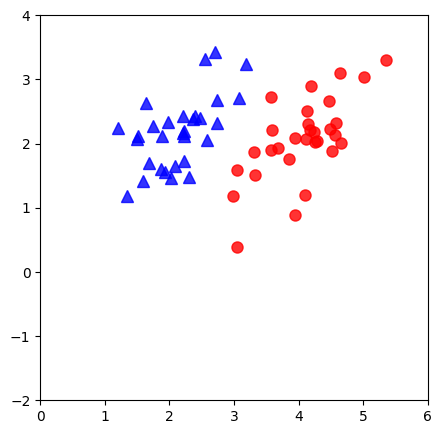

In [2]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [3]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [4]:
#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

In [5]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points

    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(61, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [10]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

ValueError: cannot reshape array of size 3 into shape (61,1)

In [6]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1 * x11 + w0) / w2, -(w1 * x12 + w0) / w2], 'k')
    else:
        x10 = -w0 / w1
        return plt.plot([x10, x10], [-100, 100], 'k')

In [7]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))

    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
        ani = plt.axis([0, 6, -2, 4])
        i2 = i if i < it else it - 1
        ani = draw_line(w[i2])
        if i < it - 1:
            # draw one misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill=
            False)
            ax.add_artist(circle)
        # hide axis

        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        label = 'PLA: iter %d/%d' % (i2, it - 1)
        ax.set_xlabel(label)
        return ani, ax

    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save('pla_vis.gif', dpi=100, writer='imagemagick')
    plt.show()
    viz_alg_1d_2(w)

# Ví dụ 2

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
main_df = pd.read_csv('sonar.all-data.csv',header=None)

main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: ylabel='60'>

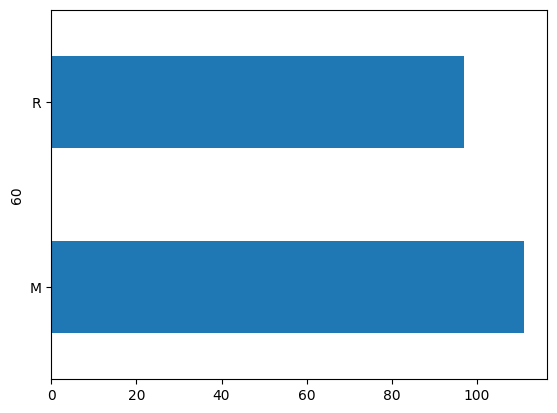

In [10]:
main_df[60].value_counts().plot(kind='barh')

In [11]:
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [12]:
inputs_df = main_df.drop(60, axis=1)

# Sau đó bổ sung cột thêm trường dữ liệu x0 = 1 vào bên trái
inputs_df = main_df.drop(60, axis=1)
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30,
random_state=42)

Tiếp theo, các bạn hãy sử dụng các hàm đã có ở Ví dụ 1, sau đó huấn luyện mô hình bằng tập dữ liệu X_train, y_train. Chú ý chúng ta cần bỏ qua các phần lệnh phục vụ việc hiển thị kết quả dạng hình vẽ.<br>
Sau đó, hãy viết bổ sung phần chương trình thực hiện việc chạy test với bộ hệ số đã có, tham khảo các bài phần trước và tính độ chính xác bằng accuracy, recall và và precision.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.3, random_state=42)

In [15]:
d = X_train.T.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train.T, np.asarray([y_train]), w_init)
print(w[-1])

[[ -41.02141473]
 [ 154.3242957 ]
 [ -50.25248007]
 [-155.68527529]
 [ 154.25367999]
 [  40.46691366]
 [  32.33566485]
 [ -68.55996098]
 [ -24.61815672]
 [  53.05868227]
 [ -55.8425213 ]
 [  85.93432581]
 [  14.03840096]
 [  -4.64483348]
 [ -10.27925657]
 [   9.90915473]
 [ -28.93756548]
 [ -34.12518811]
 [  42.42844015]
 [ -18.32849582]
 [  55.19798945]
 [ -77.52807412]
 [  78.85872539]
 [ -57.13165194]
 [  66.7140454 ]
 [  -8.44793868]
 [ -13.16300715]
 [  -1.34181332]
 [  17.19149798]
 [ -28.93118373]
 [  73.71651581]
 [-104.79434051]
 [  33.74155244]
 [  42.80018774]
 [ -51.23525591]
 [  38.4062969 ]
 [ -67.39641327]
 [  16.33025791]
 [ -12.37348781]
 [  54.60969912]
 [ -53.18502722]
 [ -10.52083633]
 [ -26.10104626]
 [  60.59017969]
 [  -0.95207635]
 [  -6.34489786]
 [  57.71243963]
 [ -47.09477435]
 [ 146.19089262]
 [ 155.99872088]
 [-213.87583968]
 [  99.25445423]
 [  71.21505352]
 [  24.10138203]
 [ 122.58922091]
 [  -7.11027948]
 [ -67.08987984]
 [ -93.64961744]
 [  47.6414444

In [16]:
y_pred = np.dot(X_test, w[-1])
y_pred = np.sign(y_pred)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.77      0.71      0.74        28
           1       0.78      0.83      0.81        35

    accuracy                           0.78        63
   macro avg       0.78      0.77      0.77        63
weighted avg       0.78      0.78      0.78        63



# Ví dụ 3 

In [18]:
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)
from sklearn.model_selection import train_test_split
cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,cancer_data.target,test_size=0.3,random_state=109)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

Thực hiện các bước tương tự như yêu cầu của Ví dụ 2. Sử dụng lại dữ liệu trong
ví dụ 2 và ví dụ 3, sau đó
- Thực hiện giảm số chiều về 02 chiều
- Hiển thị kết quả dữ liệu đã giảm chiều lên màn hình, với 2 phân lớp được biểu diễn bằng 2 màu khác nhau.

- Thực hiện phân loại bằng hồi quy Logistic và so sánh kết quả với phương pháp Perceptron đã thực hiện ở phần trước.

### ví dụ 2

In [19]:
X = main_df.drop(60, axis=1)
y_df = main_df[60]
targes_label = {'M': 1, 'R': -1}
targes_df = [targes_label[item] for item in y_df]

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X = pca.fit_transform(X)

In [21]:
new_df = np.concatenate([X, np.asarray([targes_df]).T], axis=1)

In [22]:
new_df = pd.DataFrame(new_df)
new_df.head()

,0,1,2
0,0.576093,0.319393,-1.0
1,-0.970667,1.018039,-1.0
2,-0.325887,0.874209,-1.0
3,0.852035,0.690863,-1.0
4,-0.064756,0.222968,-1.0


Thực hiện giảm số chiều về 02 chiều

In [23]:
X0 = new_df[new_df[2] == -1]
X0 = X0.drop([2], axis=1)
X0 = (np.asarray(X0)).T

X1 = new_df[new_df[2] == 1]
X1 = X1.drop([2], axis=1)
X1 = (np.asarray(X1)).T

Hiển thị kết quả dữ liệu đã giảm chiều lên màn hình, với 2 phân lớp được biểu diễn bằng 2 màu khác nhau.

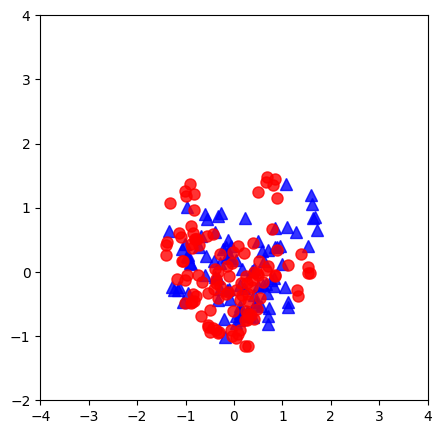

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
ani = plt.axis([-4, 4, -2, 4])
plt.show()

Thực hiện phân loại bằng hồi quy Logistic và so sánh kết quả với phương pháp Perceptron đã thực hiện ở phần trước.

In [26]:
from sklearn.linear_model import LogisticRegression

X = new_df.iloc[:, :2]
y = new_df[2]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.57      0.43      0.49        28
         1.0       0.62      0.74      0.68        35

    accuracy                           0.60        63
   macro avg       0.60      0.59      0.58        63
weighted avg       0.60      0.60      0.59        63



### Ví dụ 3

In [28]:
cancer_data = datasets.load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
X = cancer_data["data"]
y = cancer_data["target"]

In [30]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2, random_state=42)
X = pca.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
df = pd.DataFrame(np.concatenate([X, np.asarray([y]).T], axis=1))
df

,0,1,2
0,1.743043,-3.440692,0.0
1,1.906779,0.182972,0.0
2,1.496120,0.458381,0.0
3,-0.611764,-0.788775,0.0
4,1.397781,2.216483,0.0
...,...,...,...
564,2.124639,1.290300,0.0
565,1.570077,0.902061,0.0
566,0.472520,0.556677,0.0
567,1.690031,0.399528,0.0


giảm số chiều về 02 chiều

In [32]:
X0 = df[df[2] == 0.0]
X0 = X0.drop([2], axis=1)
X0 = (np.asarray(X0)).T

X1 = df[df[2] == 1.0]
X1 = X1.drop([2], axis=1)
X1 = (np.asarray(X1)).T

Hiển thị kết quả dữ liệu đã giảm chiều lên màn hình, với 2 phân lớp được biểu diễn bằng 2 màu khác nhau.

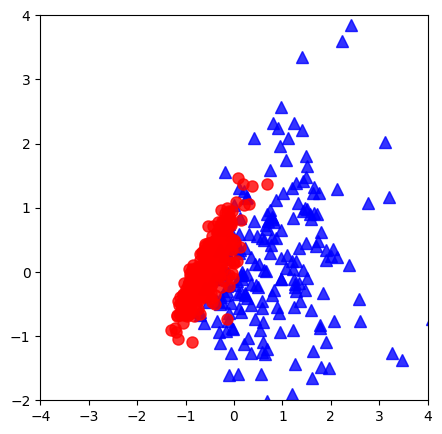

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
ani = plt.axis([-4, 4, -2, 4])
plt.show()

Thực hiện phân loại bằng hồi quy Logistic và so sánh kết quả với phương pháp Perceptron đã thực hiện ở phần trước.

In [34]:
X = df.iloc[:, :2]
y = df[2]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92        63
         1.0       0.92      0.99      0.96       108

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.94       171
weighted avg       0.94      0.94      0.94       171



- So sánh:
    + Ở Ví dụ 2, độ chính xác và thu hồi thấp hơn cho cả hai lớp so với Ví dụ 3.

    + Ví dụ 3 cho thấy độ chính xác, thu hồi và Điểm F1 cao hơn cho cả hai lớp.

    + Ở Ví dụ 3 có hiệu suất tốt hơn về độ chính xác, khả năng thu hồi và Điểm F1, cũng như độ chính xác cao hơn (0,94) so ​​với Ví dụ 3 (0,60).

- Đối với VD2, khi giảm chiều và vẽ biểu đồ, dễ thấy lý do độ chính xác của mô hình thấp là do dữ liệu không tách được tuyến tính, trong khi VD3 có thể tách được tuyến tính thì độ chính xác của nó rất cao
